### Training Regression Trees to find the feature importance, plotting partial dependency plots,  and also calculating performing permutation feature importance, and SHAP analysis to see which features drive the #reservations

### Author: Mitodru Niyogi

## Methods for feature importance

1. Tree based feature importance (Random Forest, Decision Tree, GradientBoosting regressors) based on mean decrease in impurity
(MDI) were tried out to calculate the feature importance of the dataset.
2. Permutation-based Feature importance was also performed on both training and test sets to find the important features that
drives the number of reservations.
3. SHAP feature importance along with summary plot and dependency plots were utilized to understand how much each feature
drives the final target variable that is number of reservations count.

### Tree-based models
They provide a measure of feature importance based on the mean decrease in impurity (MDI). 
Impurity is quantified by the splitting criterion of the decision trees (Gini, Log Loss or Mean Squared Error). 
However, this method can give high importance to features that may not be predictive on unseen data when the model is
overfitting. Tree-based feature importance based on provides insights into which features are most informative for
making predictions in tree-based models. It helps identify the key variables that contribute significantly to the 
model's performance and can guide feature selection, interpretation, and model refinement.

### Permutation Feature Importance:

Permutation-based feature importance is a technique that measures the importance of each feature by shuffling the values of that feature and observing the effect on the model's performance.
It calculates the decrease in the model's performance (e.g., accuracy, mean squared error) when a feature's values are randomly permuted while keeping the other features unchanged.
By comparing the decrease in performance to a baseline, such as the original model's performance, it determines the relative importance of each feature.
Permutation feature importance provides a feature importance score that represents how much the model relies on each feature for its predictions.
It is a model-agnostic technique and can be applied to any machine learning algorithm.
Permutation-based feature importance, on the other hand, avoids this issue, since it can be computed on 
unseen data.

Furthermore, impurity-based feature importance for trees are strongly biased and favor high cardinality features 
(typically numerical features) over low cardinality features such as binary features or categorical variables with
a small number of possible categories.  Permutation-based feature importances do not exhibit such a bias. 
Additionally, the permutation feature importance may be computed performance metric on the model predictions
and can be used to analyze any model class (not just tree-based models).


### SHAP Values Feature Importance:

SHAP values are a unified measure of feature importance based on cooperative game theory concepts.
SHAP values quantify the contribution of each feature to the prediction for a specific instance by considering all
possible feature combinations.
They provide a way to assign credits or values to features, indicating how much each feature contributes to the
difference between the expected model output and the actual output for a given instance.
SHAP values take into account the interactions and dependencies between features, providing a more nuanced understanding 
of feature importance. They can be used to explain the individual predictions of a model or to calculate aggregate 
feature importance across multiple instances. SHAP values are model-specific and rely on the specific model structure
and algorithm used.


In summary, permutation feature importance evaluates feature importance by measuring the decrease in model 
performance due to feature shuffling, while SHAP values provide a more comprehensive and model-specific assessment of feature importance by considering the contribution of each feature to the prediction for individual instances. 
Both techniques can be valuable for understanding feature importance, and therefore, we tried out these methods to understand the important factors driving the number of reservations and how's the car's technology type seem to affect reservations.

In [2]:
import sys
sys.path.append('../')

In [ ]:
import warnings


from src.constants import numerical_features, categorical_features, target_variable
from src.utils import split_data, merge_and_process_data
from src.batch_score import batch_prediction

from src.train import get_ml_models

warnings.filterwarnings("ignore")

In [4]:
import os
os.getcwd()

'/home/mitodru/Documents/interviews/Turo-task/Notebooks'

folder ../results already exists
Saving predictions
RandomForest
Average Training Mean Squared Error for RandomForest is 0.430 (0.014)
Average Validation MSE for RandomForest is 3.072 (0.204)
Average Training R^2 score for RandomForest is 0.887 (0.003)
Average Validation R^2 score for RandomForest is 0.190 (0.045)
Test MSE for RandomForest is 2.441
Test R^2 for RandomForest is 0.284095
-------------------------------------------------
-----------Partial Dependency Plots---------------


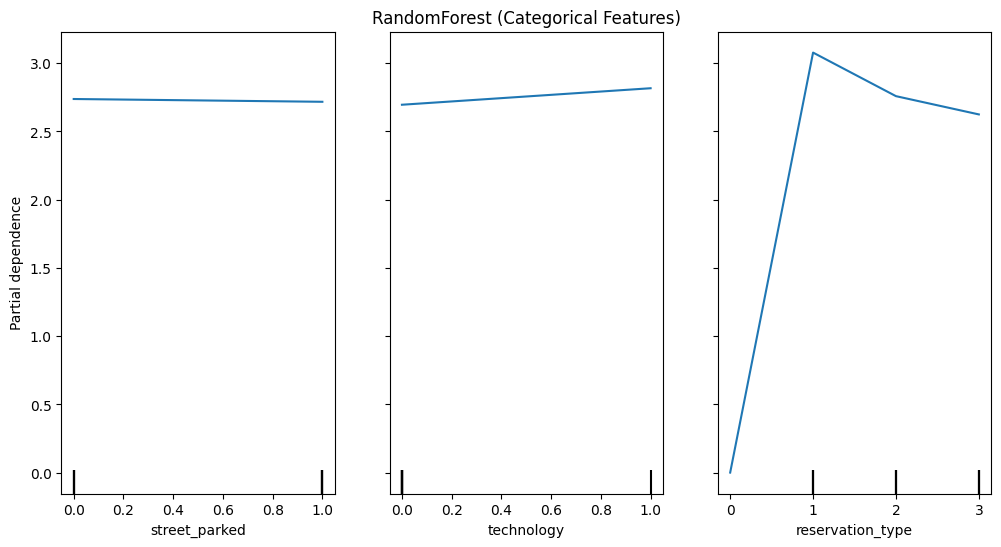

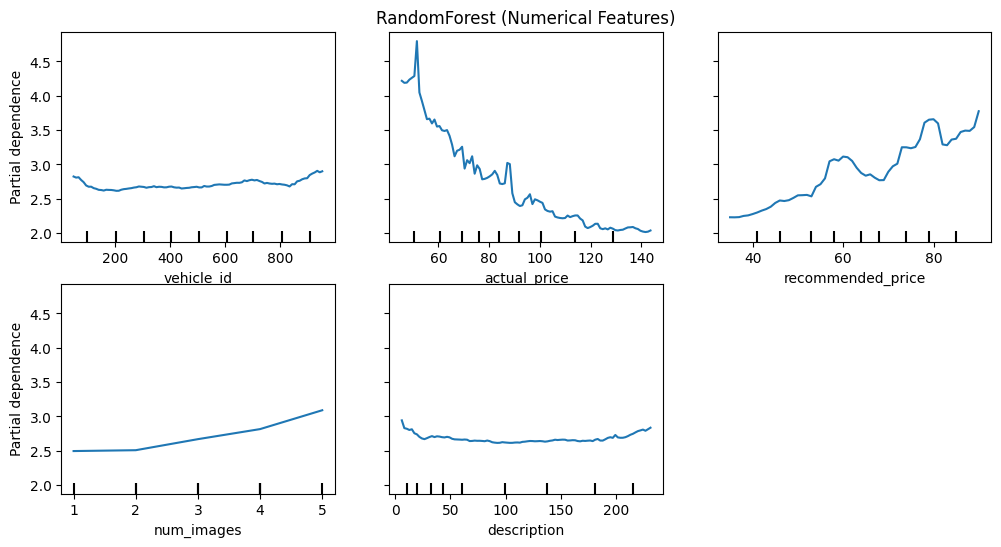

------------Tree Feature Importance Plot---------------------------------


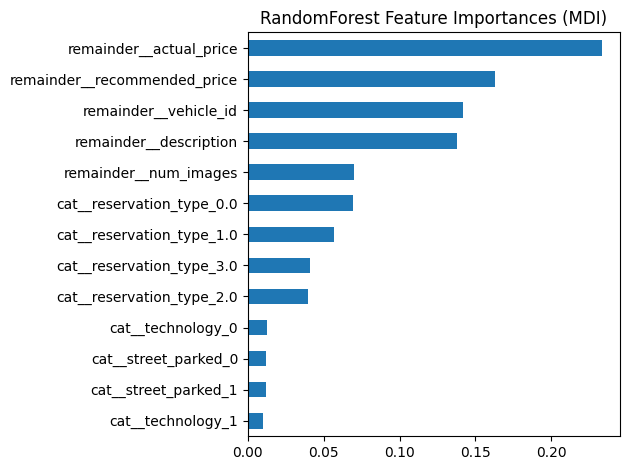

-------------Permutation Test importance Plot----------------------------------


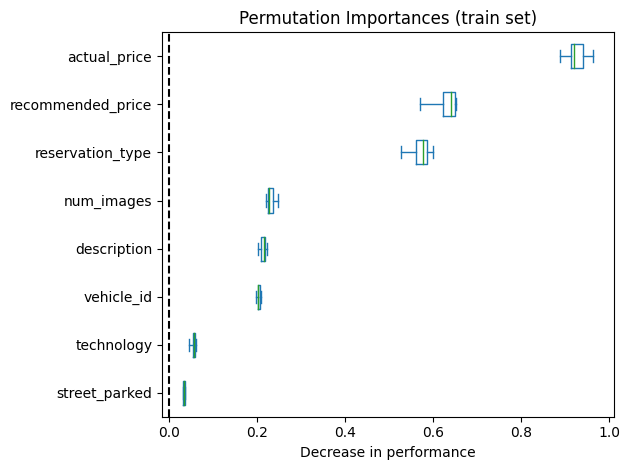

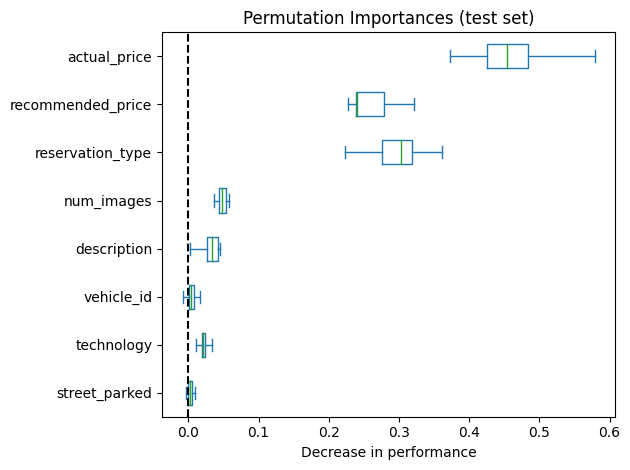

------------------SHAP ANALYSIS PLOTS-------------------------------
TREE SHAP ANALYSIS FOR TRAIN SET

------------TREE SHAP Feature Importance Plot-------------------------------------


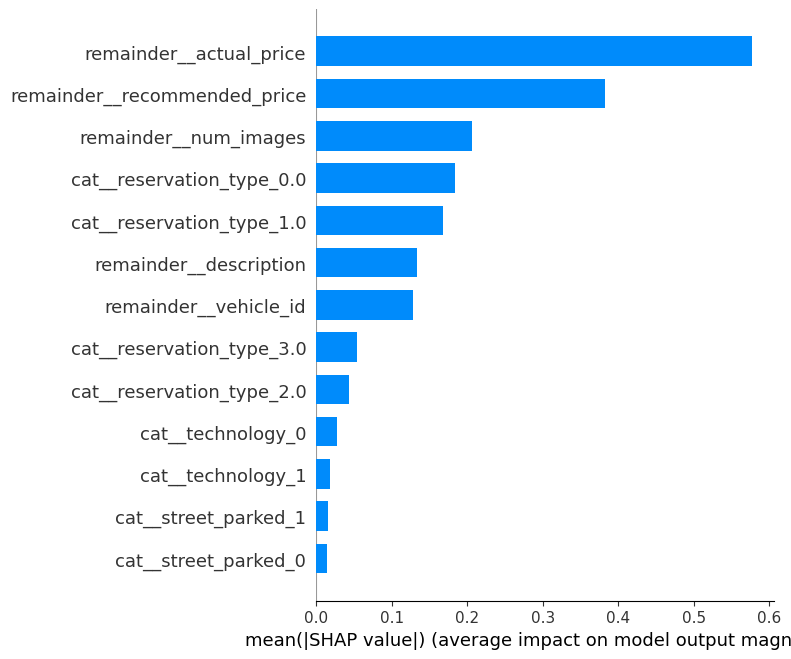

------------------TREE SHAP Summary Plot-------------------------------


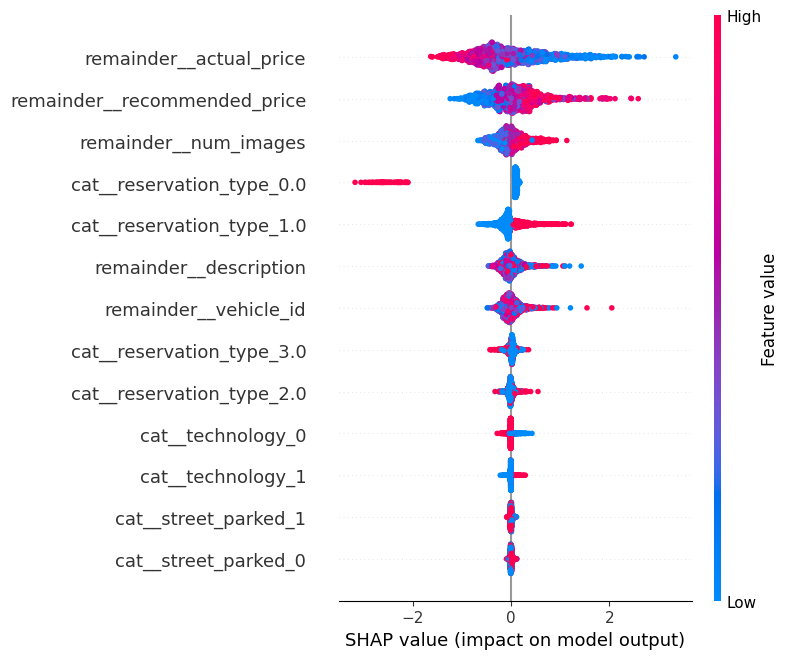

-------------TREE SHAP Dependence Plots by top 5 rank------------------------------------


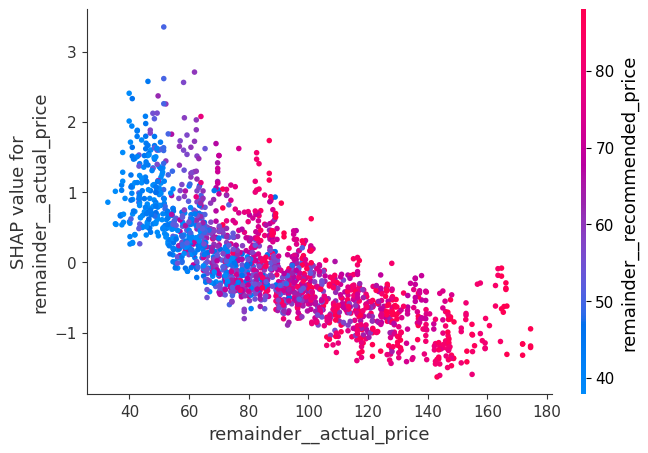

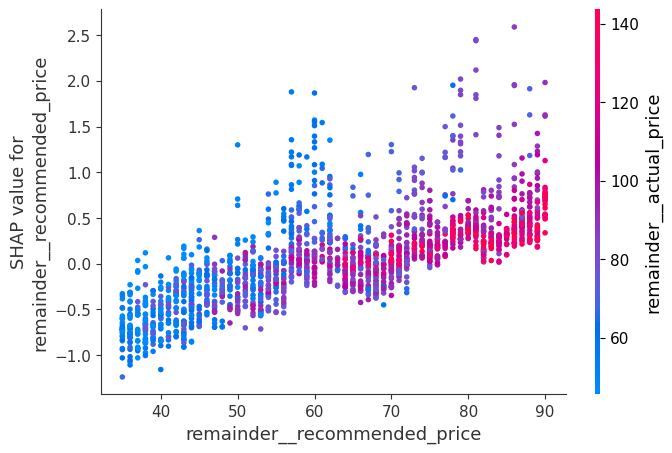

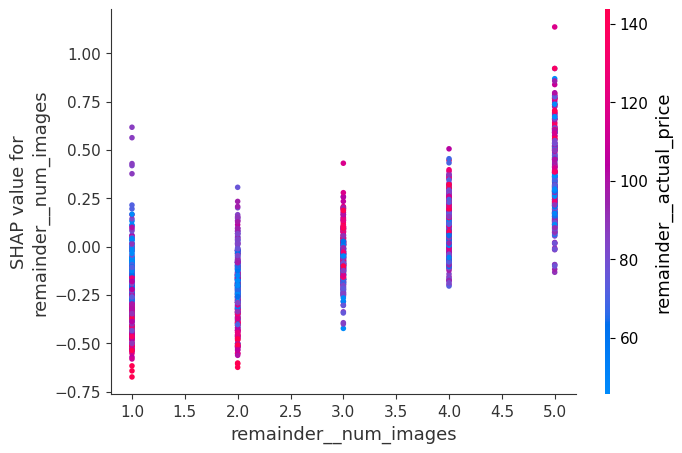

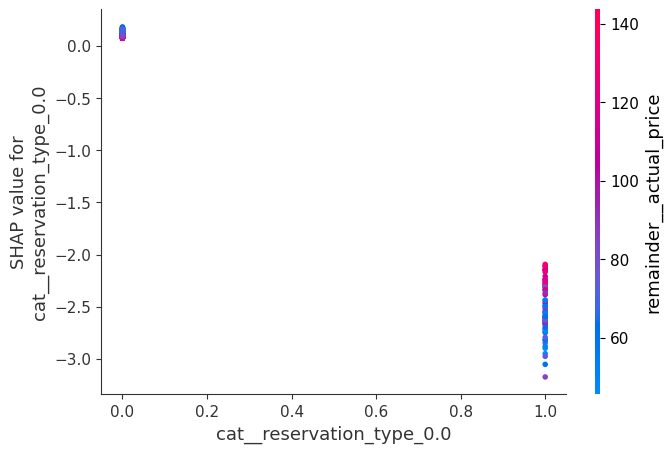

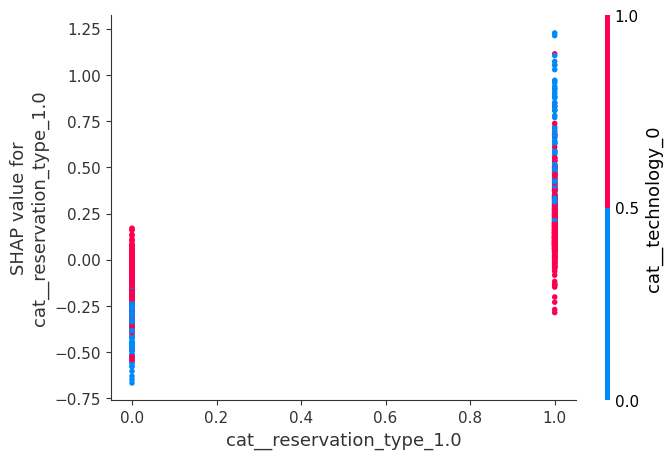

SHAP ANALYSIS FOR TEST SET

------------TREE SHAP Feature Importance Plot-------------------------------------


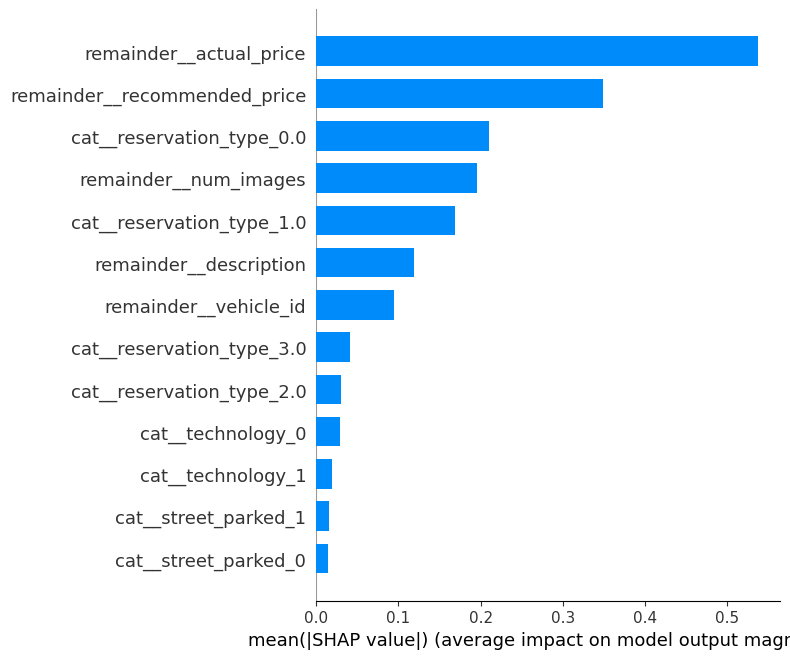

------------TREE SHAP Summary Plot-------------------------------------


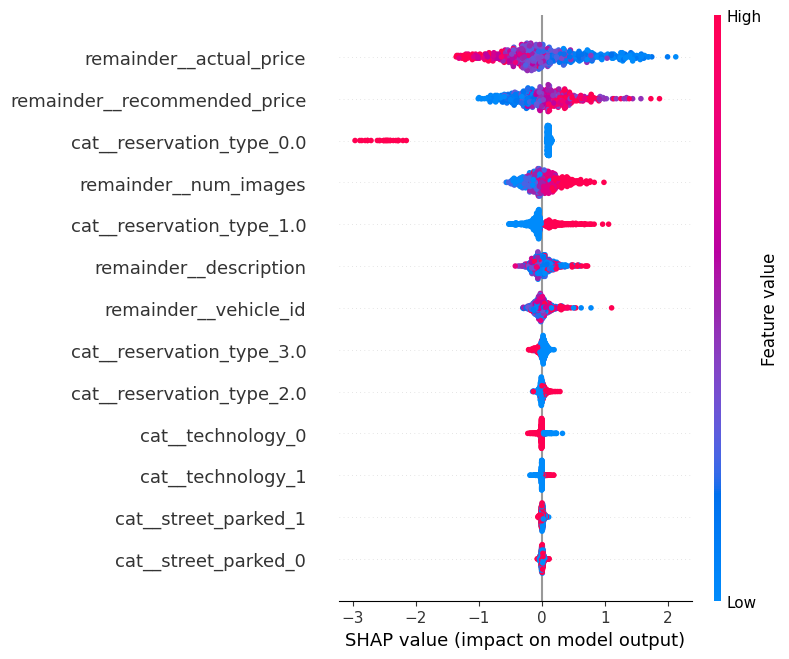

-------------TREE SHAP Dependence Plots by top 5 rank------------------------------------


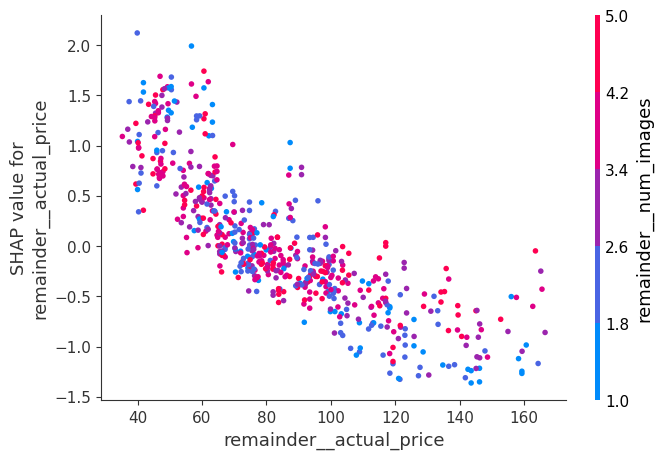

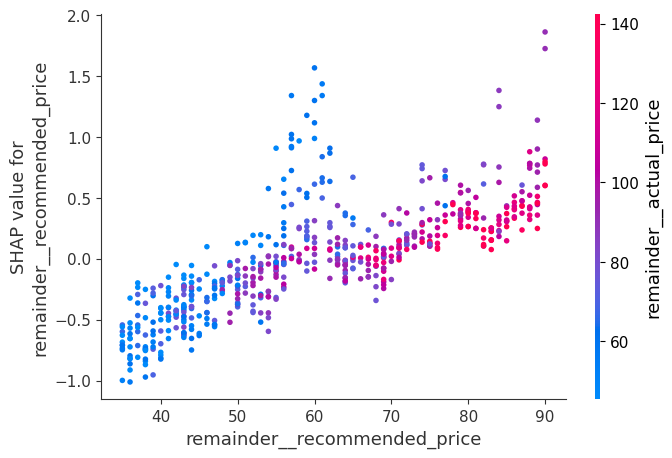

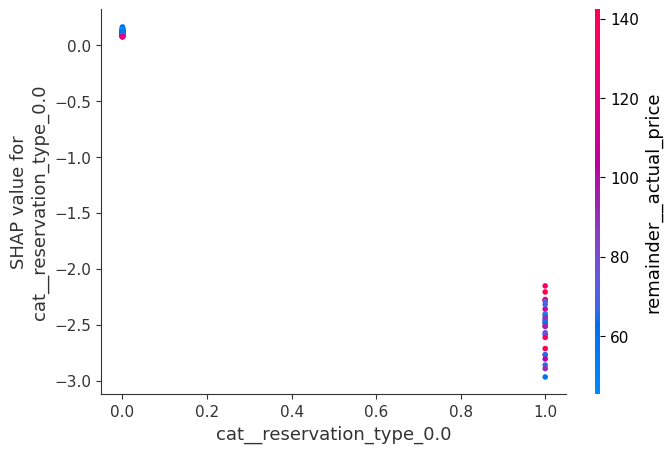

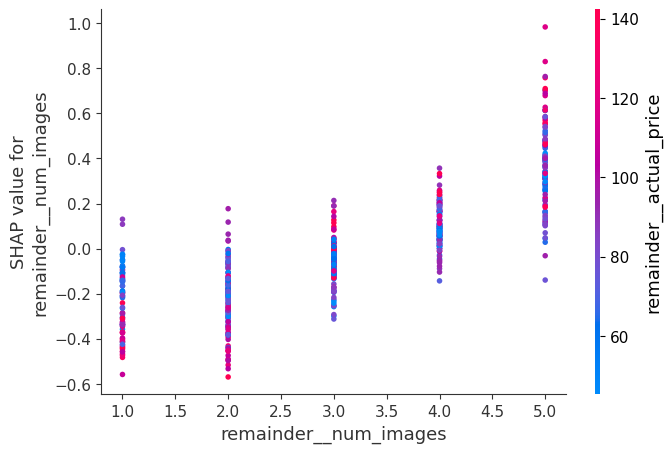

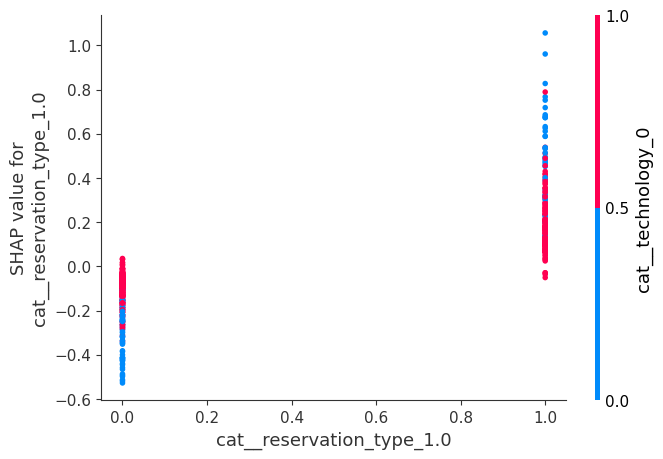

-------------------------------------------------
folder ../models already exists
Saving predictions
GBR
Average Training Mean Squared Error for GBR is 2.112 (0.041)
Average Validation MSE for GBR is 2.904 (0.149)
Average Training R^2 score for GBR is 0.444 (0.010)
Average Validation R^2 score for GBR is 0.234 (0.022)
Test MSE for GBR is 2.490
Test R^2 for GBR is 0.269748
-------------------------------------------------
-----------Partial Dependency Plots---------------


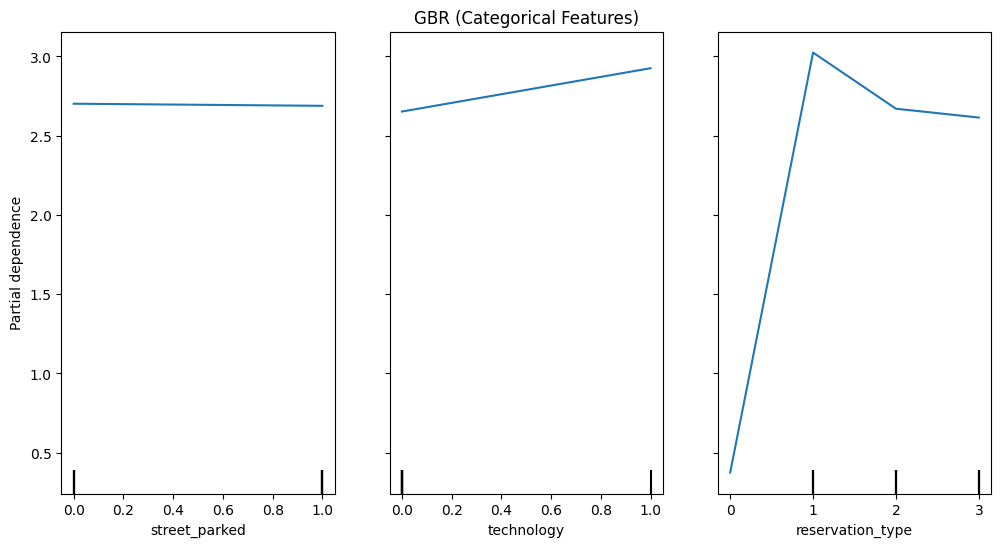

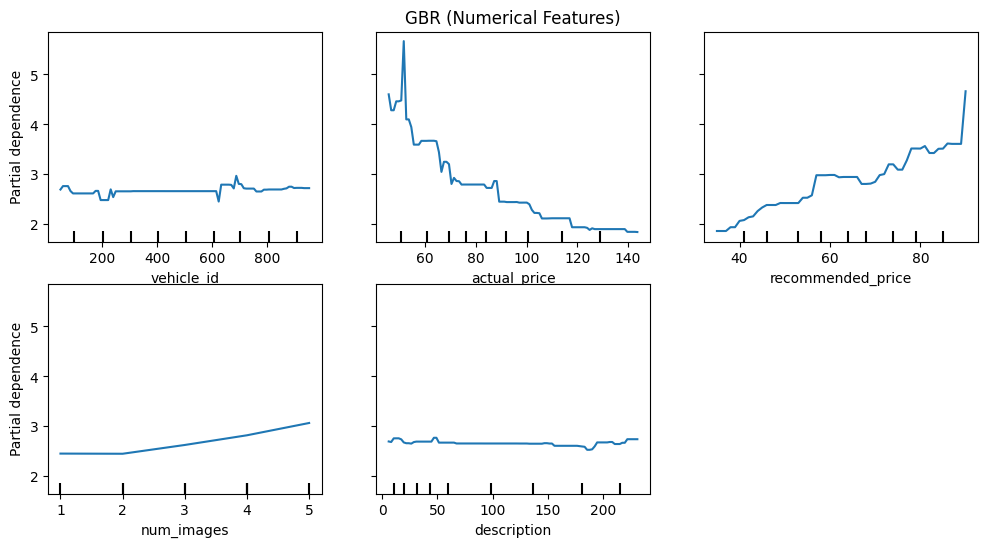

------------Tree Feature Importance Plot---------------------------------


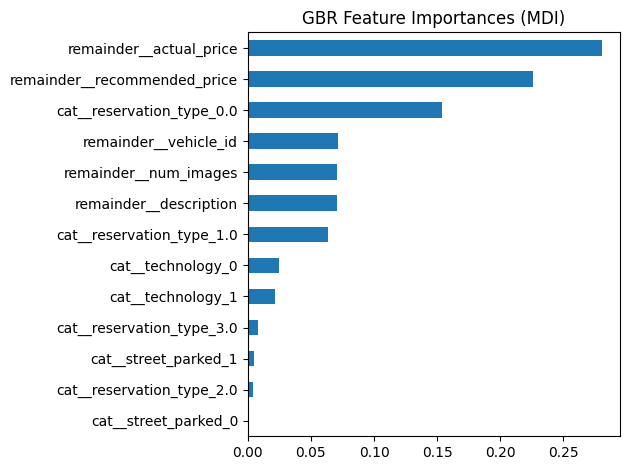

-------------Permutation Test importance Plot----------------------------------


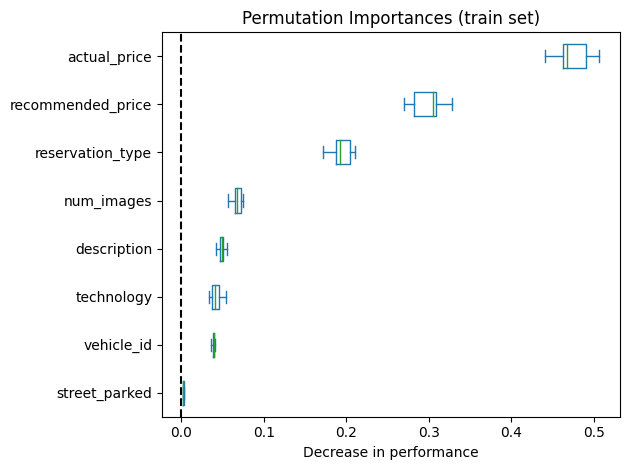

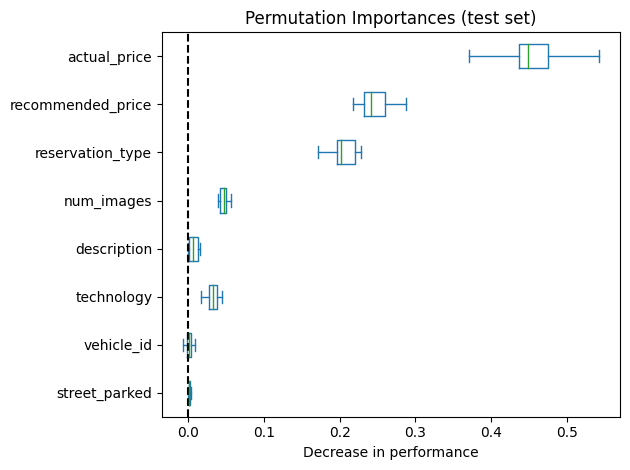

------------------SHAP ANALYSIS PLOTS-------------------------------
TREE SHAP ANALYSIS FOR TRAIN SET

------------TREE SHAP Feature Importance Plot-------------------------------------


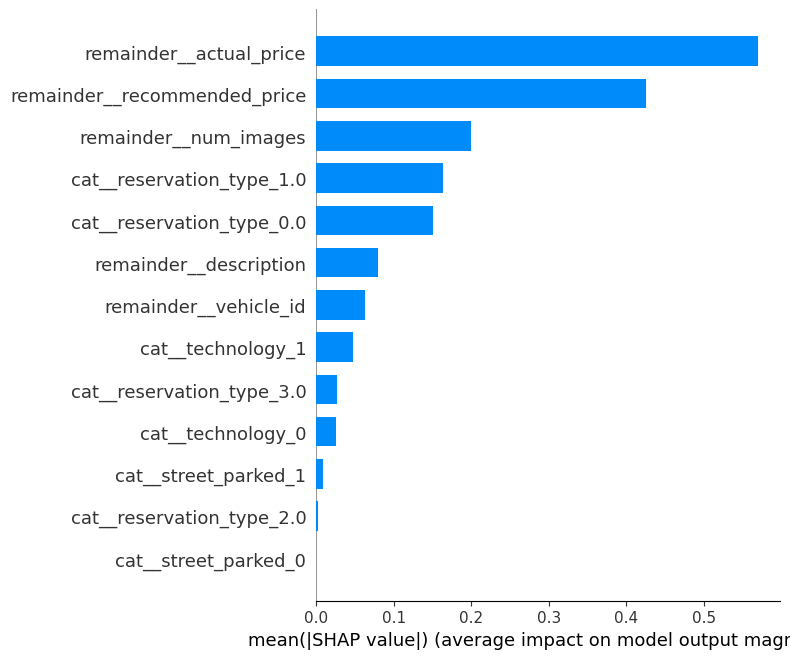

------------------TREE SHAP Summary Plot-------------------------------


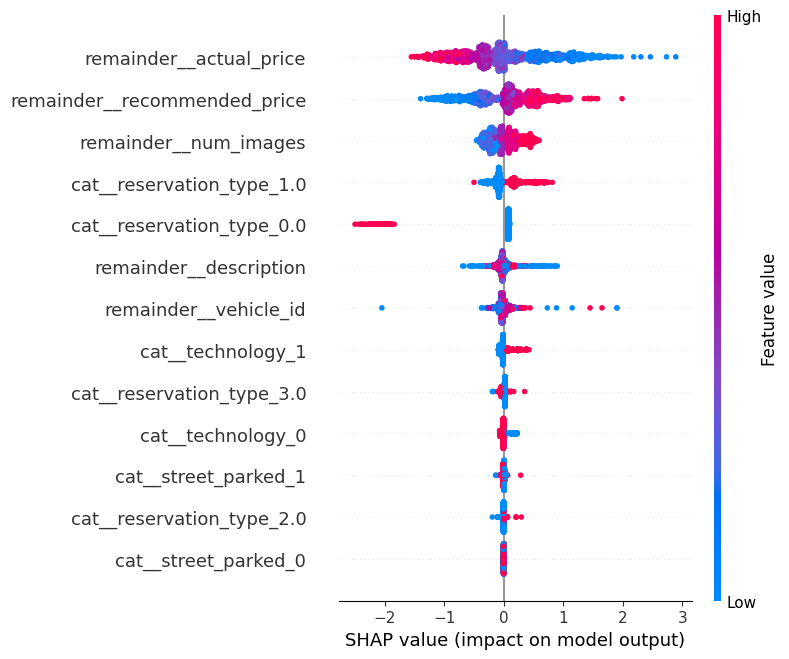

-------------TREE SHAP Dependence Plots by top 5 rank------------------------------------


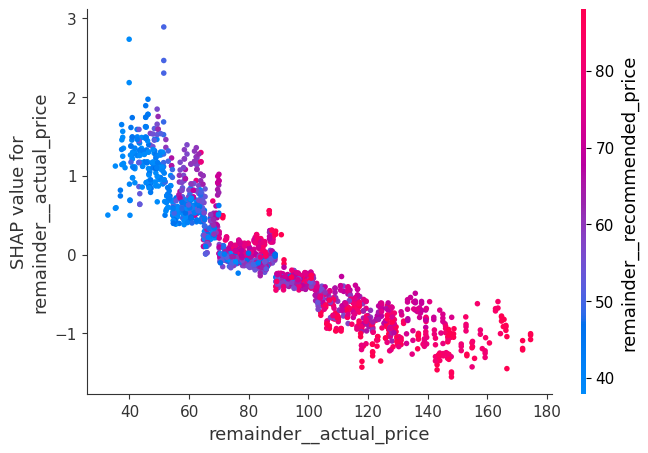

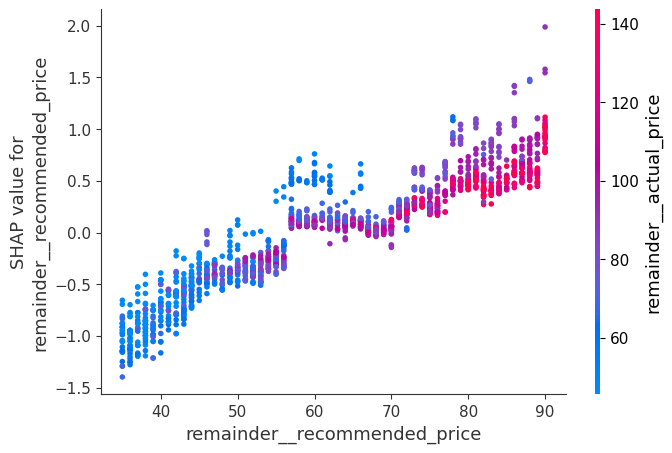

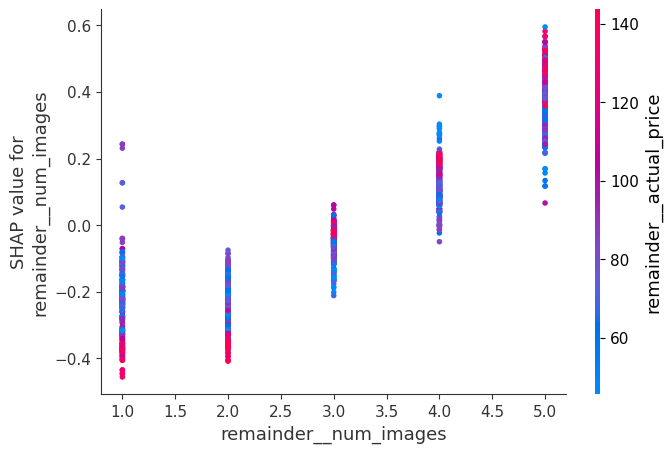

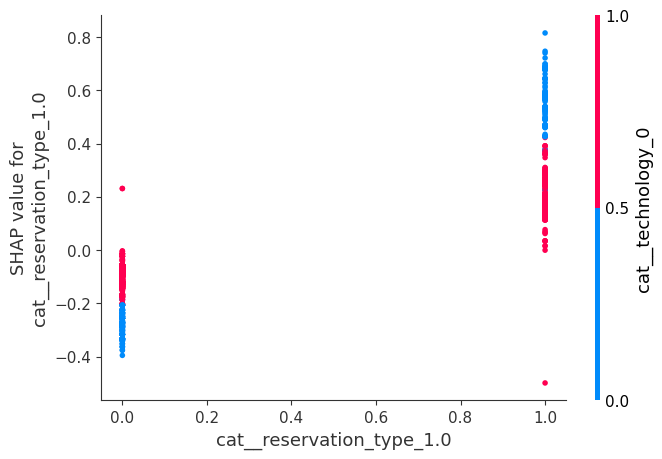

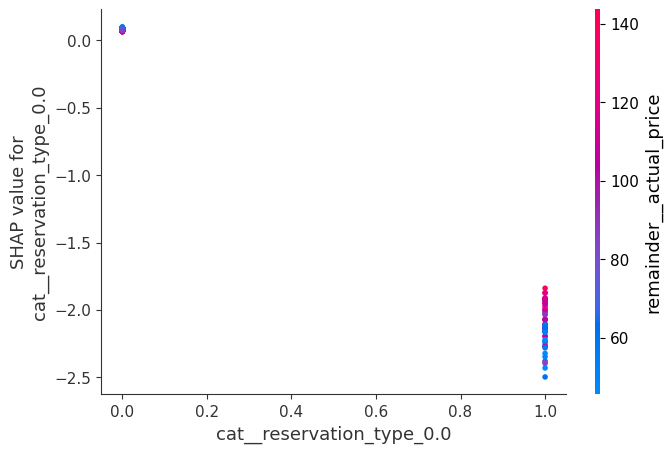

SHAP ANALYSIS FOR TEST SET

------------TREE SHAP Feature Importance Plot-------------------------------------


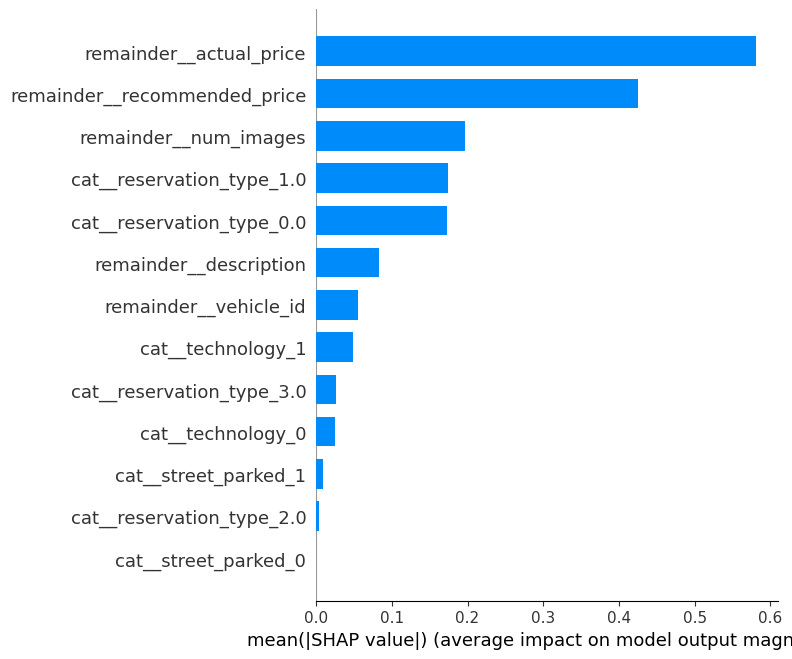

------------TREE SHAP Summary Plot-------------------------------------


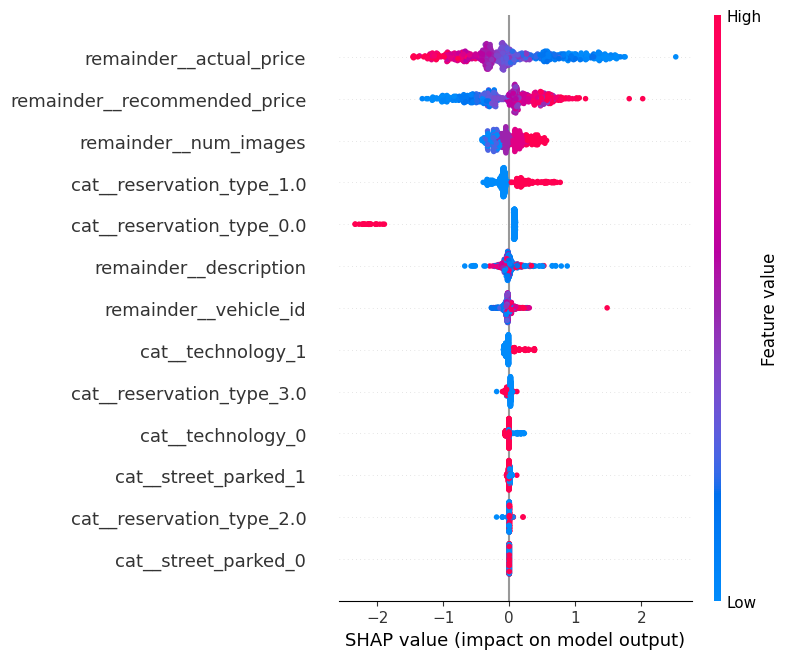

-------------TREE SHAP Dependence Plots by top 5 rank------------------------------------


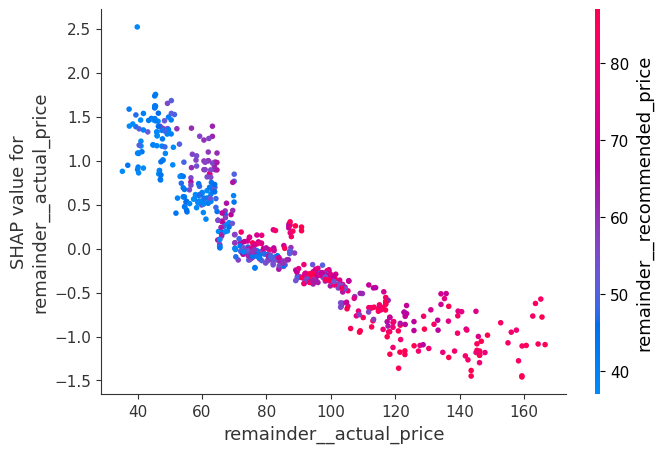

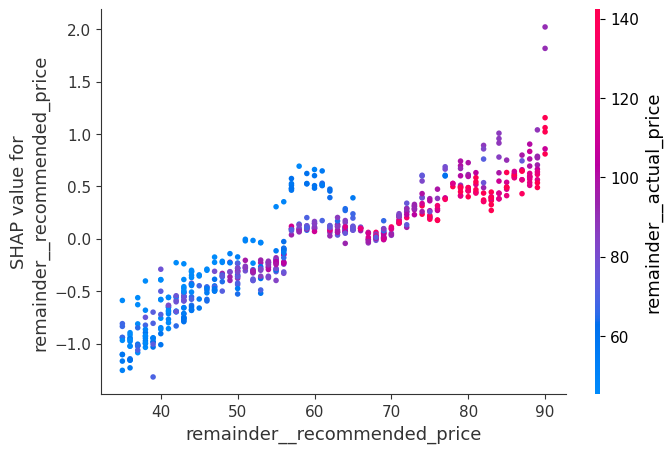

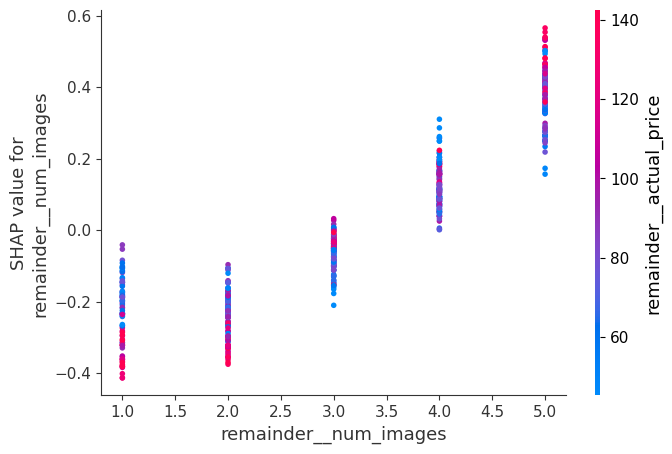

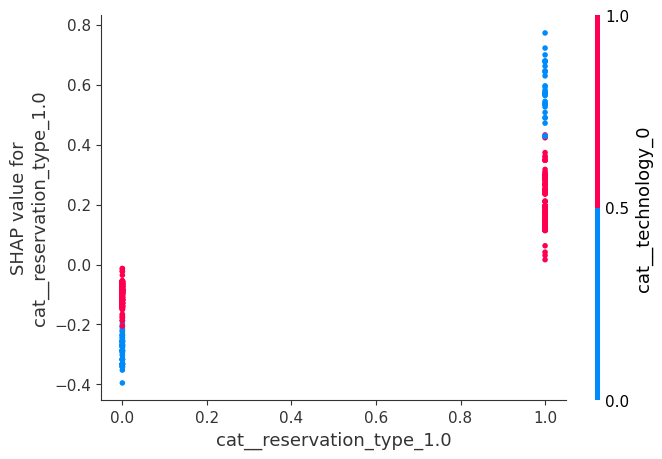

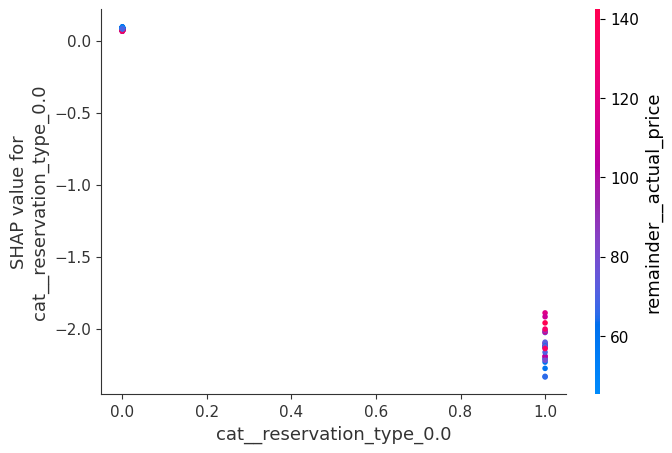

-------------------------------------------------
folder ../models already exists
Saving predictions
DecisionTree
Average Training Mean Squared Error for DecisionTree is 0.000 (0.000)
Average Validation MSE for DecisionTree is 5.663 (0.406)
Average Training R^2 score for DecisionTree is 1.000 (0.000)
Average Validation R^2 score for DecisionTree is -0.493 (0.098)
Test MSE for DecisionTree is 4.728
Test R^2 for DecisionTree is -0.386619
-------------------------------------------------
-----------Partial Dependency Plots---------------


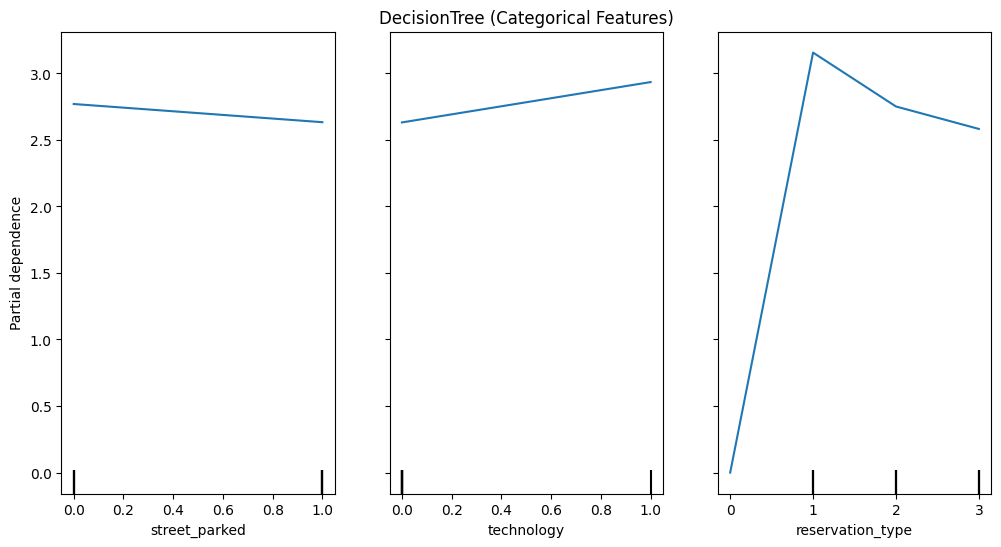

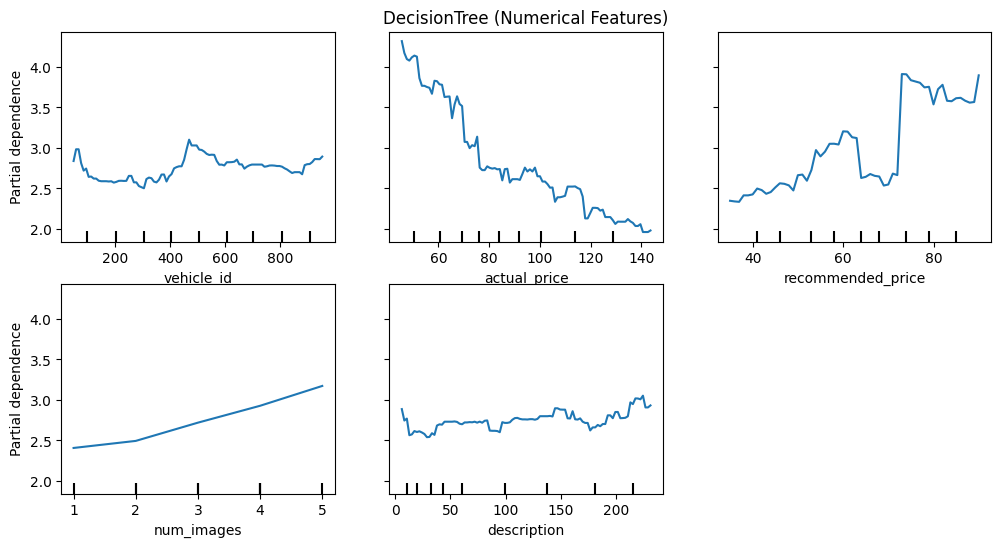

------------Tree Feature Importance Plot---------------------------------


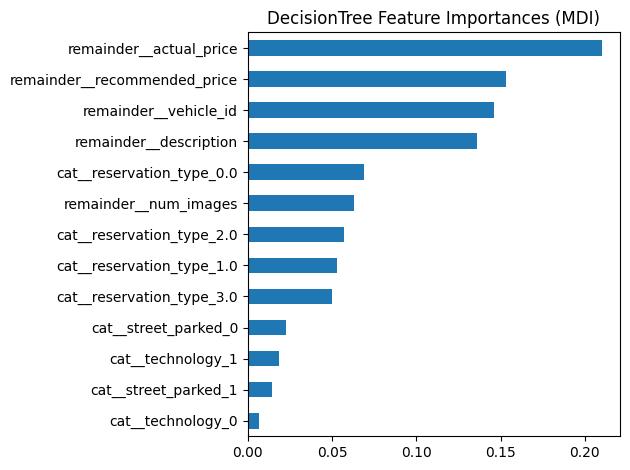

-------------Permutation Test importance Plot----------------------------------


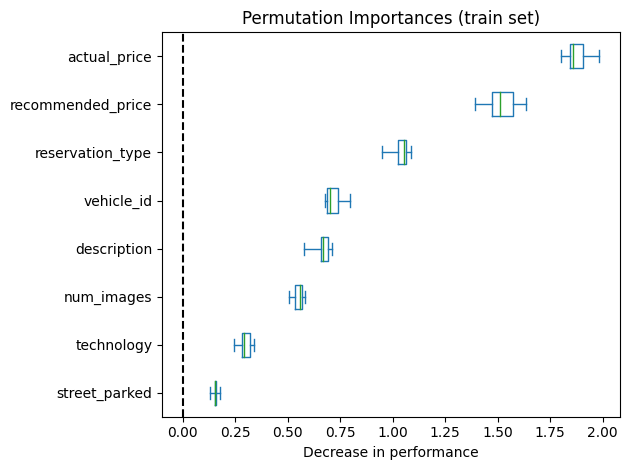

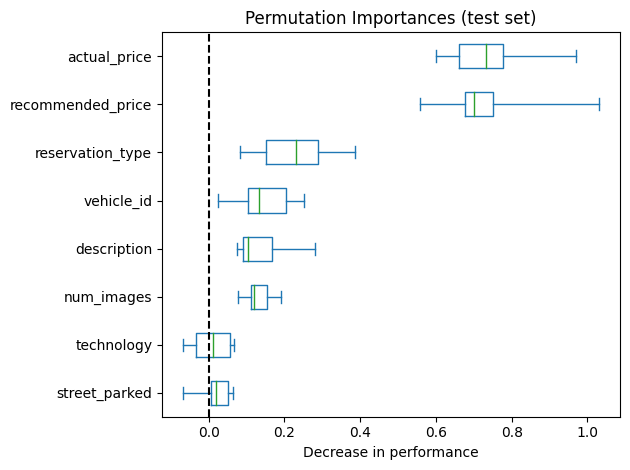

------------------SHAP ANALYSIS PLOTS-------------------------------
TREE SHAP ANALYSIS FOR TRAIN SET

------------TREE SHAP Feature Importance Plot-------------------------------------


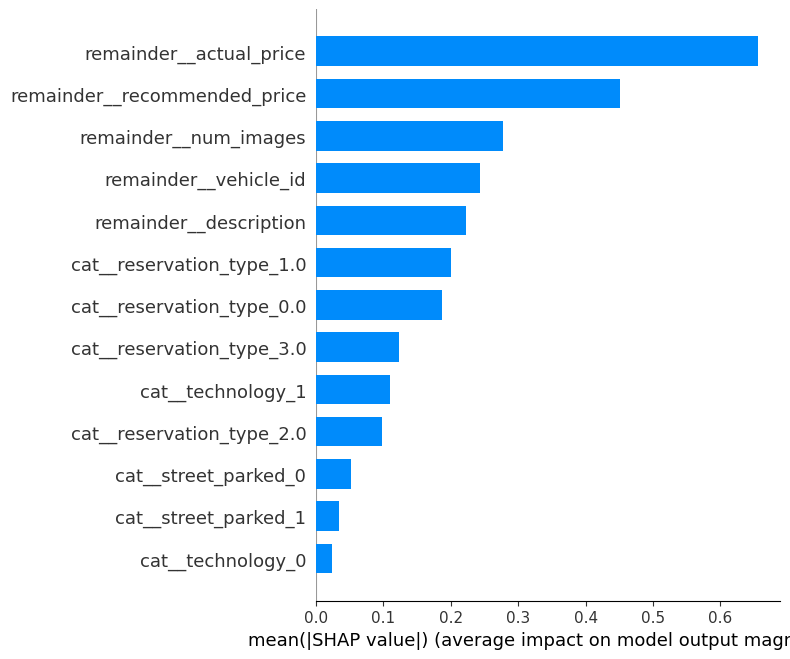

------------------TREE SHAP Summary Plot-------------------------------


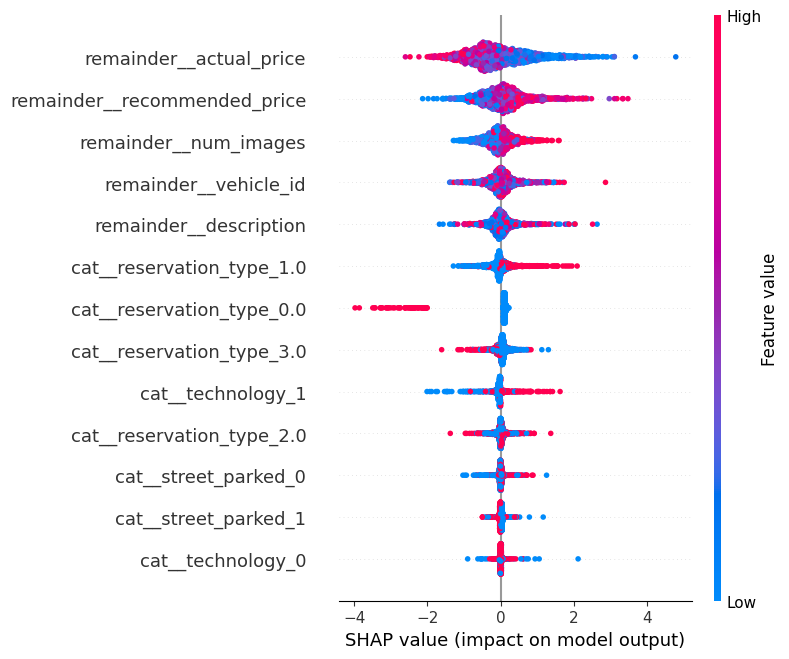

-------------TREE SHAP Dependence Plots by top 5 rank------------------------------------


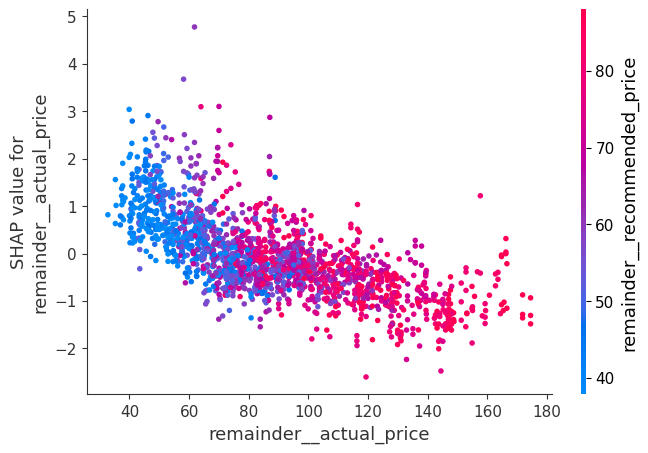

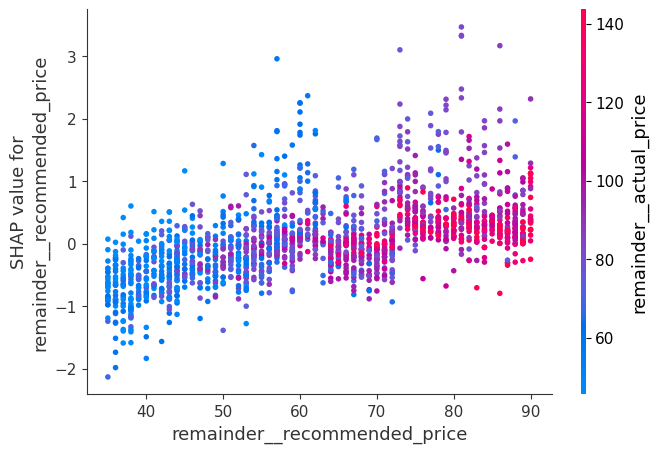

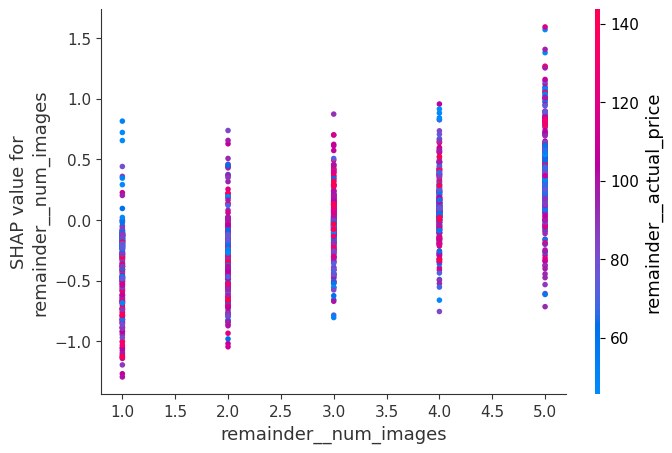

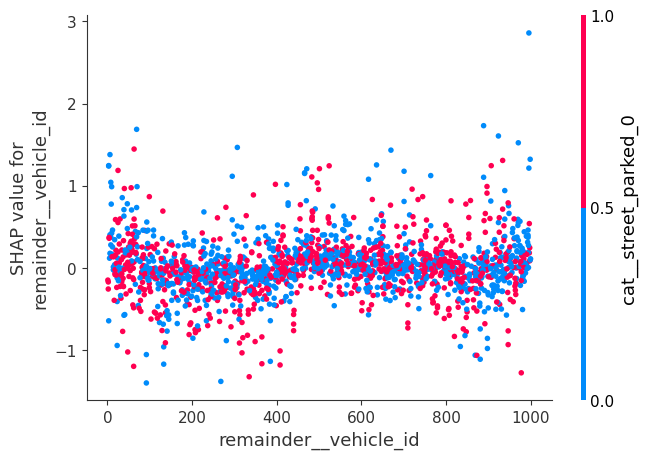

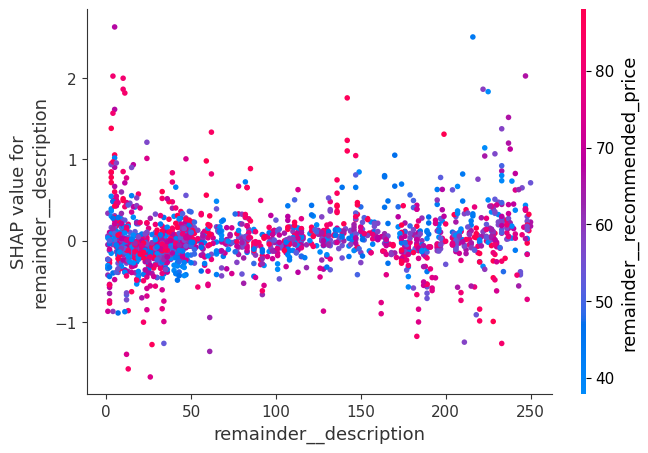

SHAP ANALYSIS FOR TEST SET

------------TREE SHAP Feature Importance Plot-------------------------------------


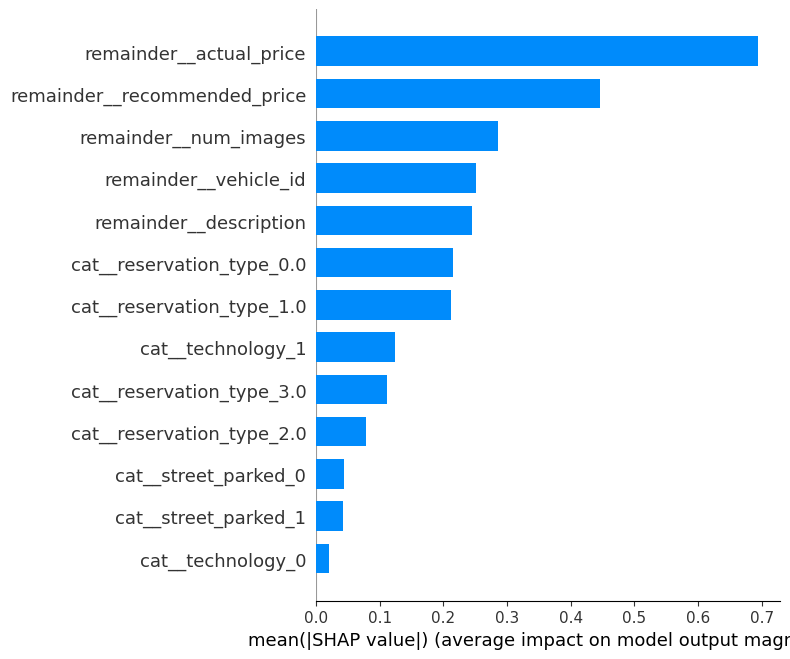

------------TREE SHAP Summary Plot-------------------------------------


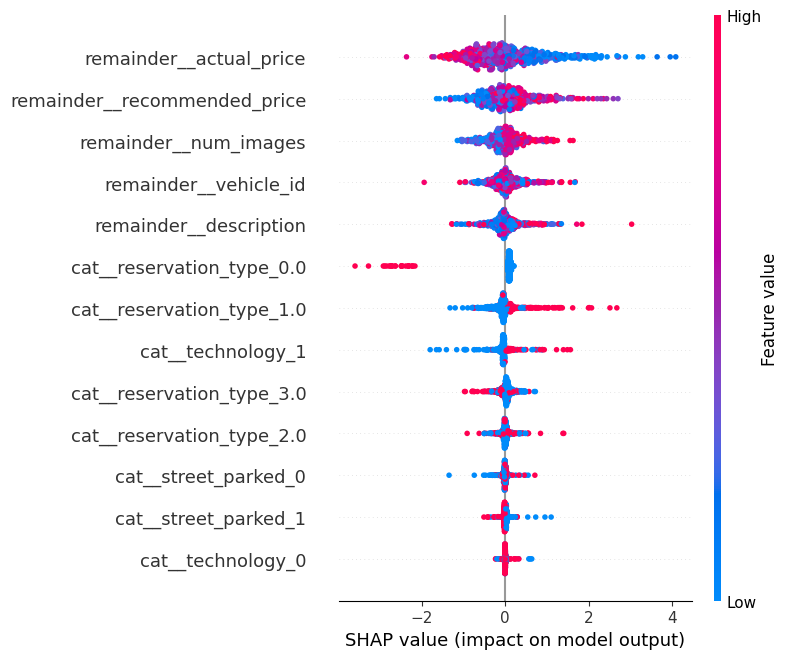

-------------TREE SHAP Dependence Plots by top 5 rank------------------------------------


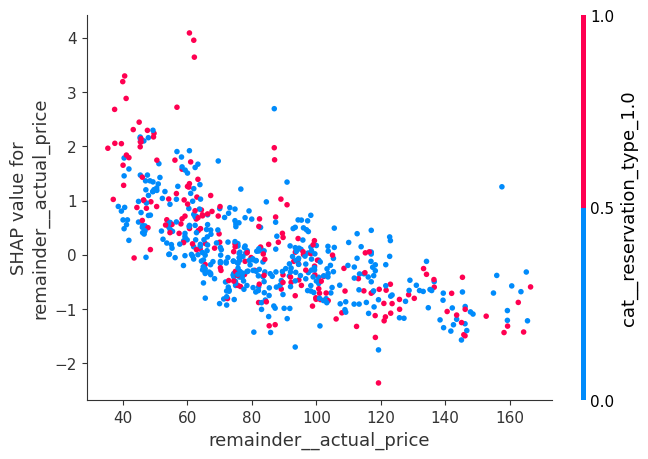

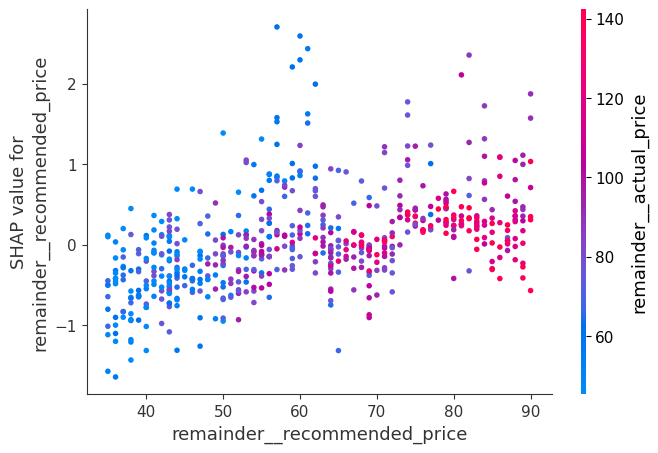

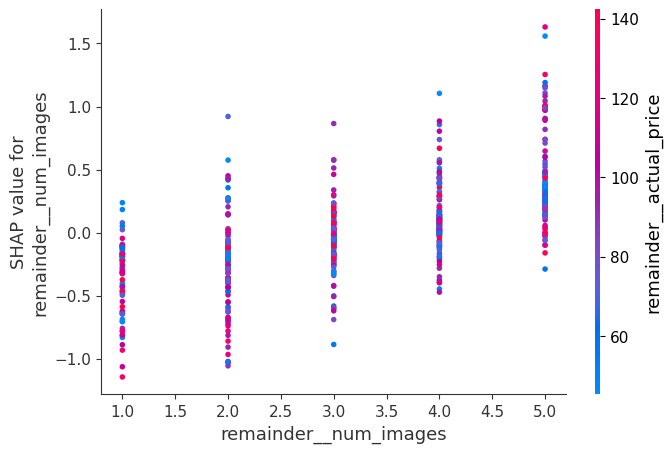

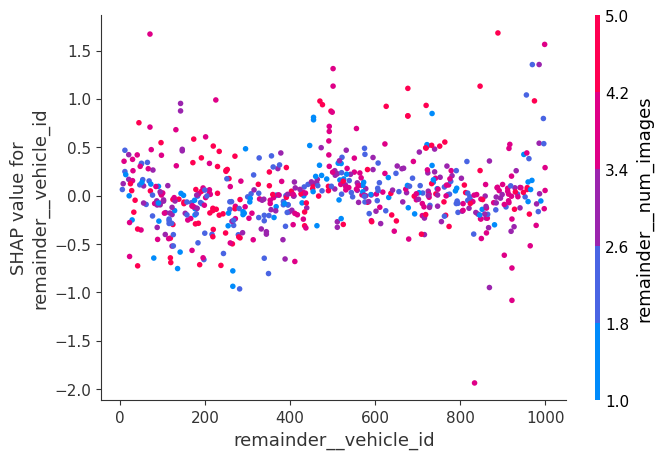

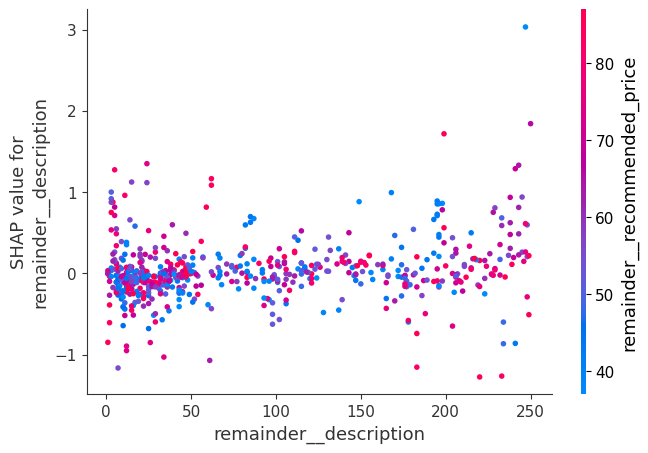

-------------------------------------------------
folder ../models already exists


In [5]:
def main():
    data = merge_and_process_data('../data/reservations.csv', '../data/vehicles.csv')
    x_train, x_test, y_train, y_test = split_data(data, numerical_features, categorical_features,
                                                  target_variable, random_state=42)
    # getting all the implemented ml models
    models = get_ml_models()
    # getting the predictions for both the training and testing datasets
    batch_prediction(x_train, y_train, x_test, y_test, models)


if __name__ == "__main__":
    main()


We see from SHAP Dependency plots that the car technology with value 1 has higher impact on the number of reservations

In [ ]:
actual_price, recommended_price, reservation_type, num_images, descriptions